In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-colorblind')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os
print(os.listdir("../input"))

['titanic', 'titanic-input-data']


In [3]:
df_train = pd.read_csv('../input/titanic-input-data/train.csv')
df_test = pd.read_csv('../input/titanic-input-data/test.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.shape

(891, 12)

In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
for col in df_train.columns:
    wsg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(wsg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    wsg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(wsg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

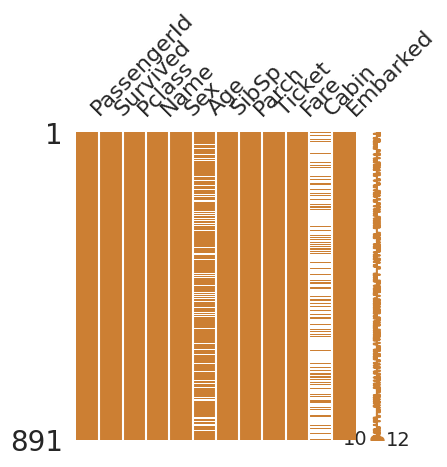

In [10]:
msno.matrix(df=df_train.iloc[:,:], figsize=(4,4), color=(0.8, 0.5, 0.2))

<Axes: >

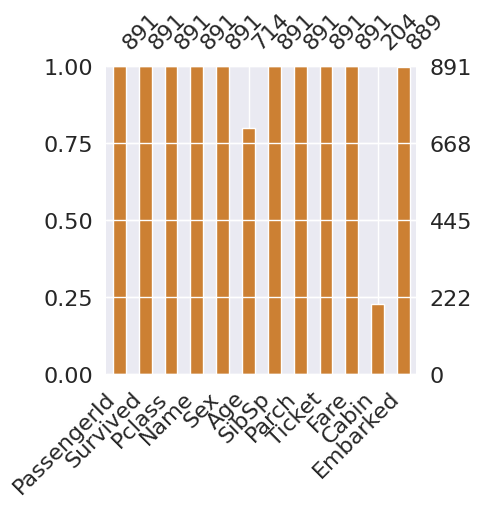

In [11]:
msno.bar(df=df_train.iloc[:,:], figsize=(4,4), color=(0.8, 0.5, 0.2))

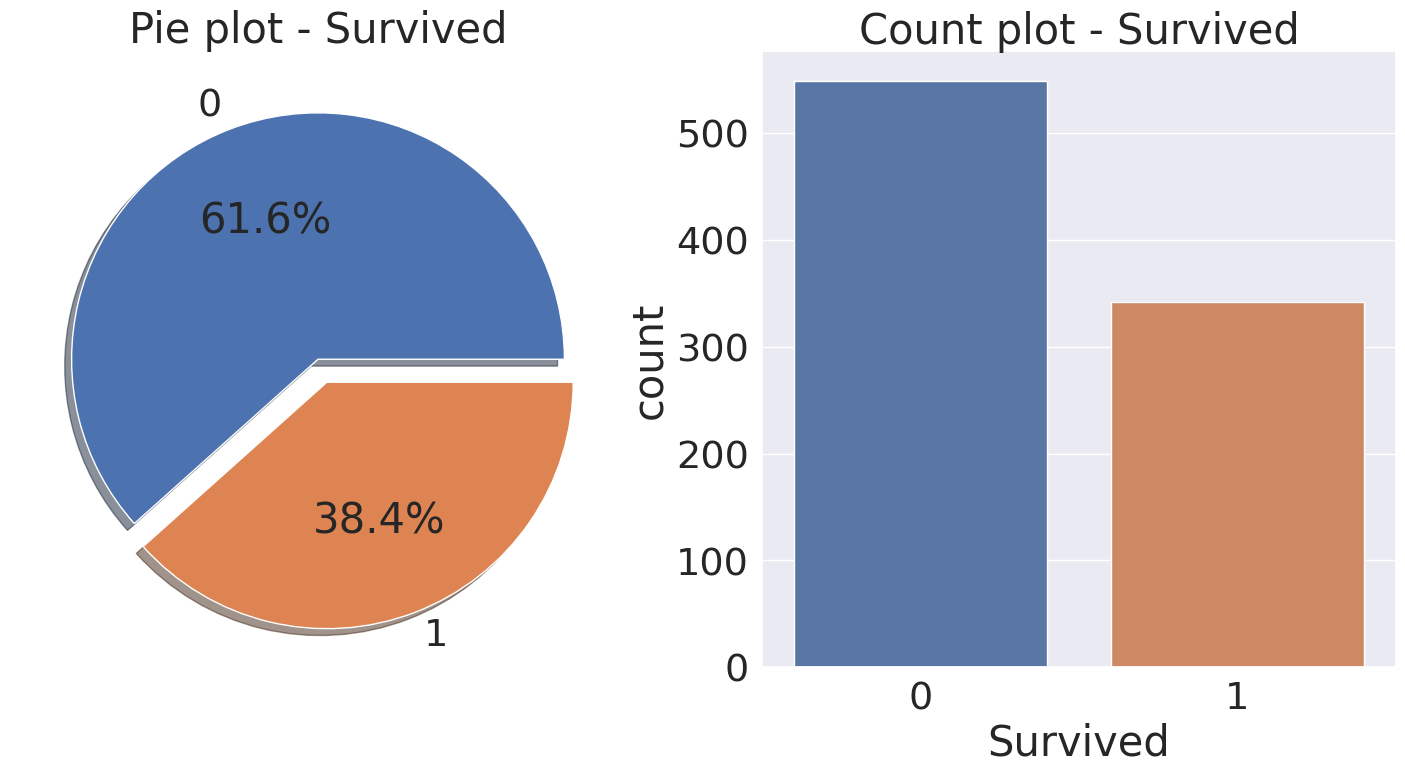

In [12]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [13]:
df_train.shape

(891, 12)

**2.1 Pclass**

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

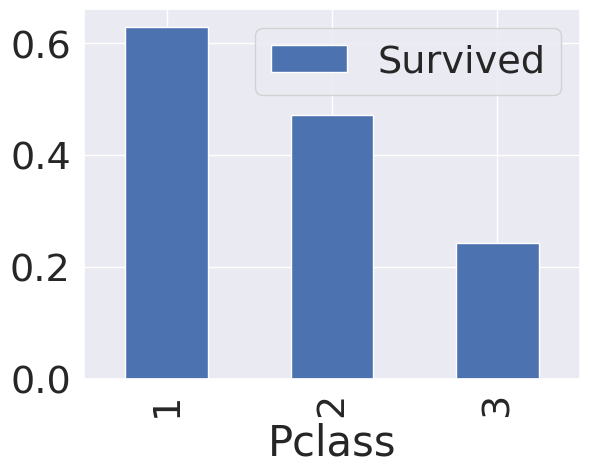

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

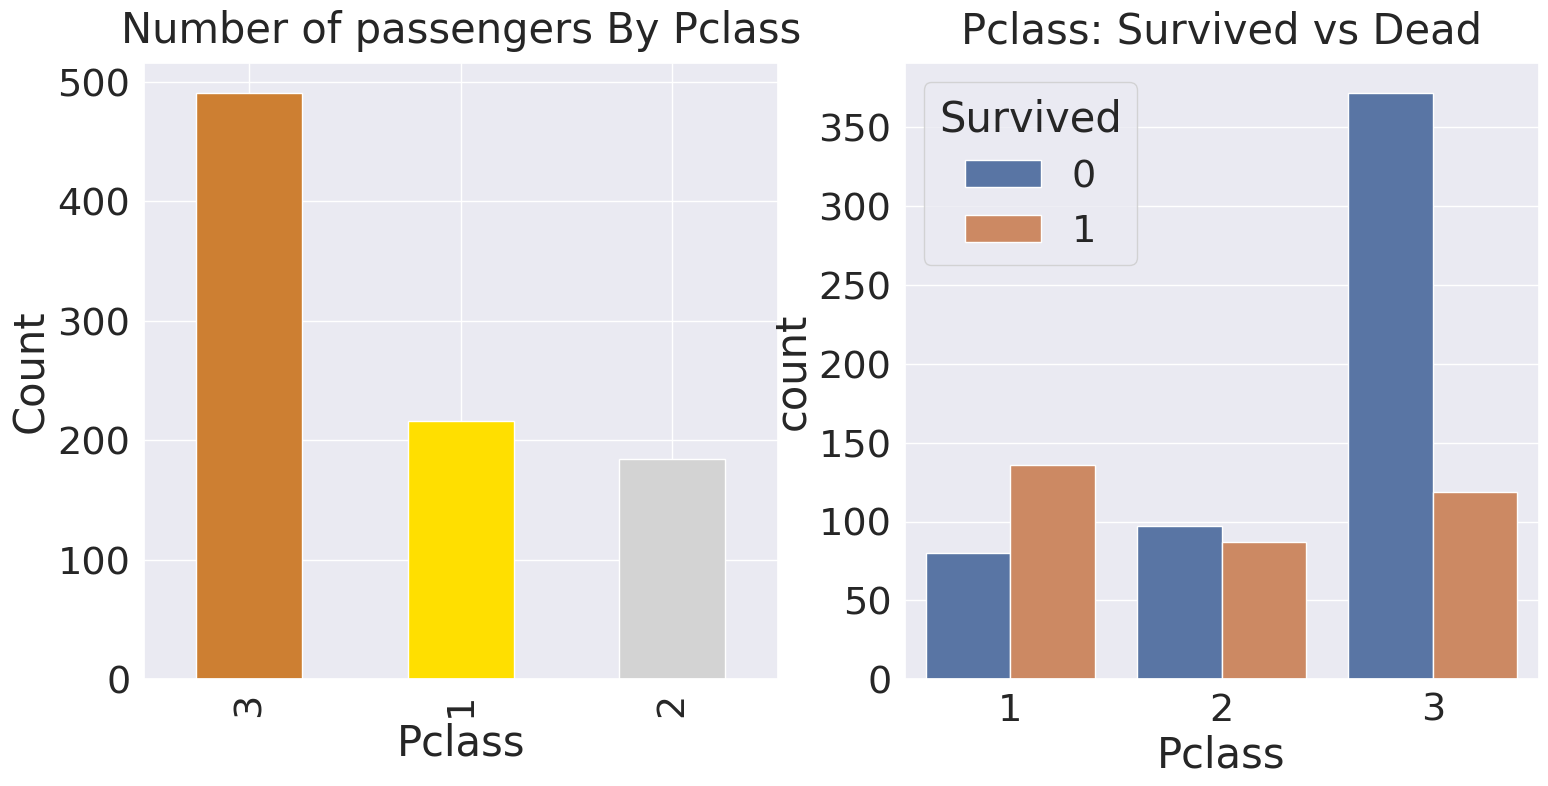

In [19]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

**2.2 Sex**

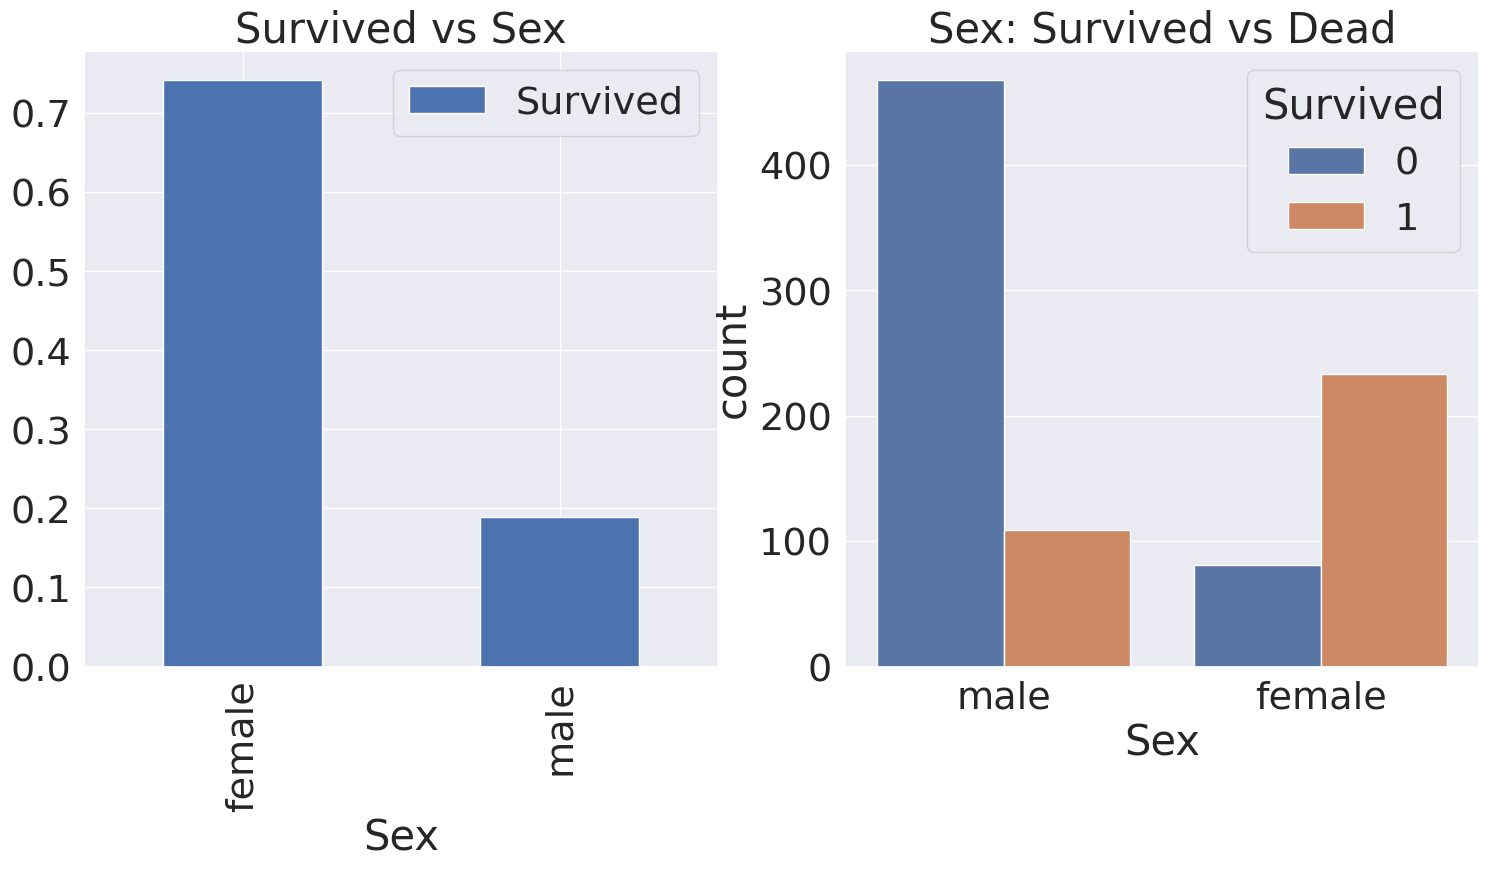

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


**2.2 Both Sex and Pclass**

<Axes: xlabel='Pclass', ylabel='Survived'>

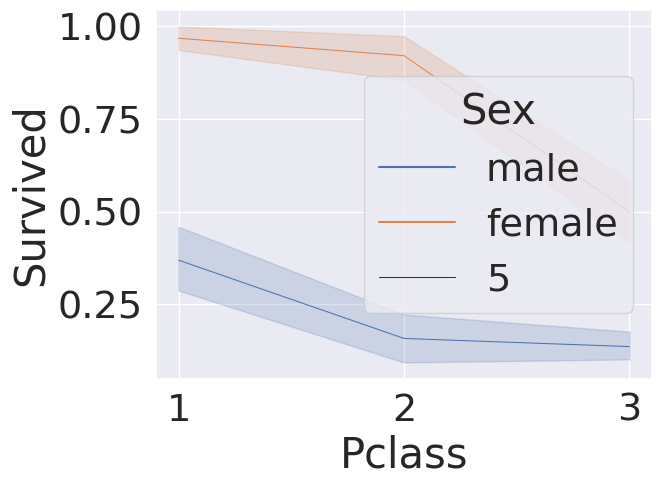

In [23]:
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_train, size=5)

- Lady First
- Money brings Survival

**Age**

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [25]:
foo=df_train['Age']

In [26]:
foo.abs

<bound method NDFrame.abs of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

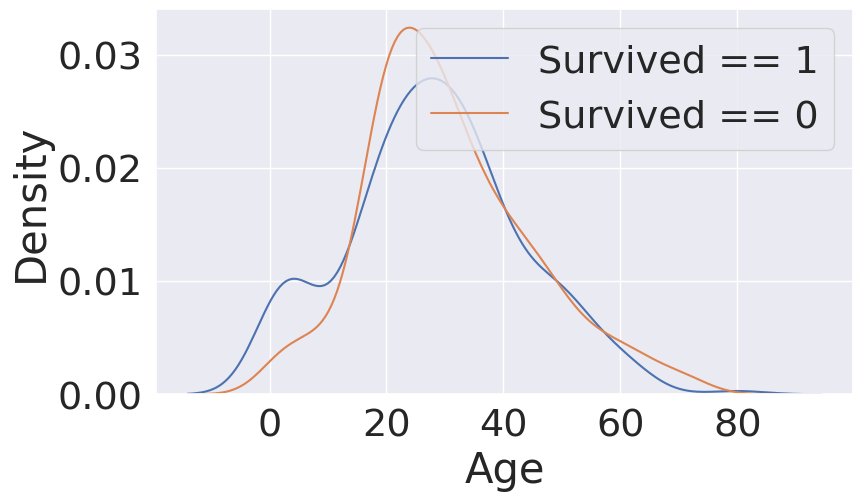

In [27]:
flg, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

나이가 어릴수록 살아난 확률이 높다

<Axes: >

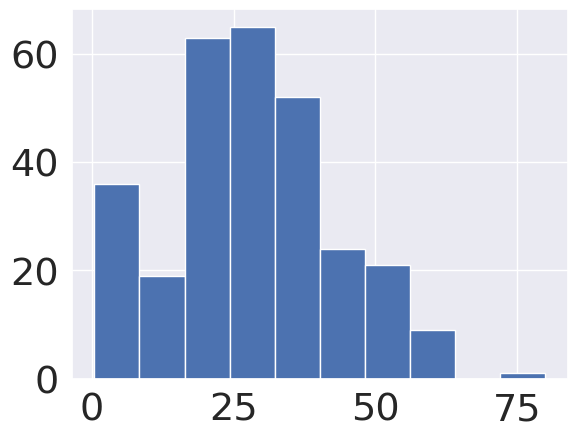

In [28]:
df_train[df_train['Survived'] == 1]['Age'].hist()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

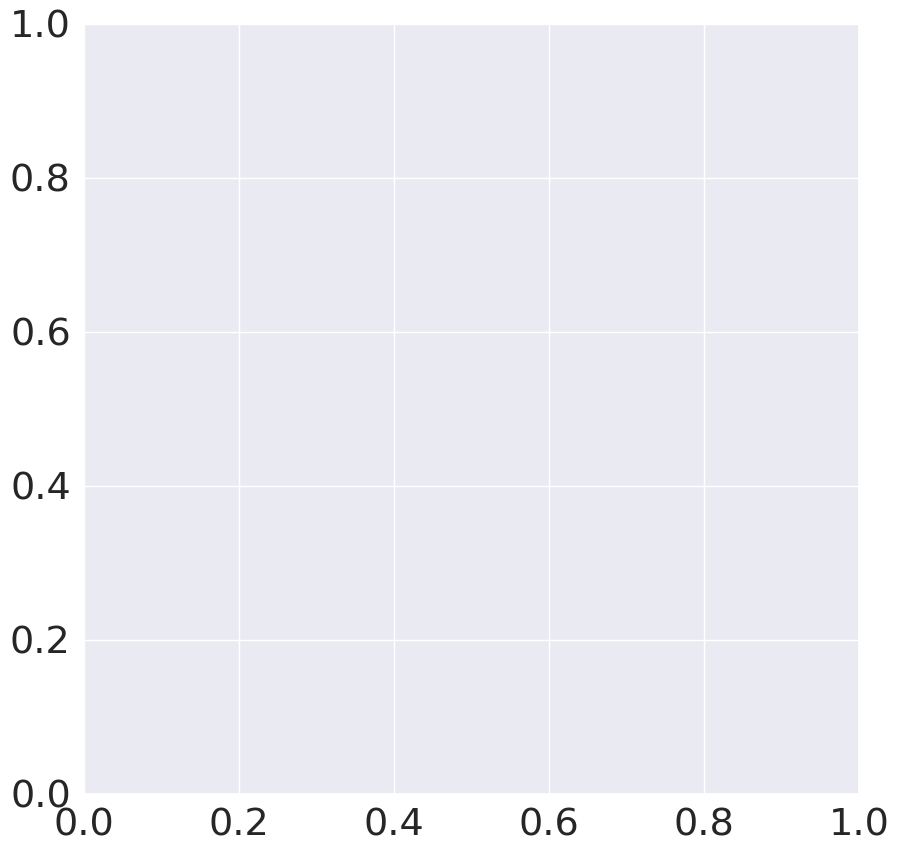

<Figure size 1000x1000 with 0 Axes>

In [29]:
f = plt.figure(figsize=(10, 10))

f, ax = plt.subplots(1, 1, figsize=(10, 10))

plt.figure(figsize=(10,10))

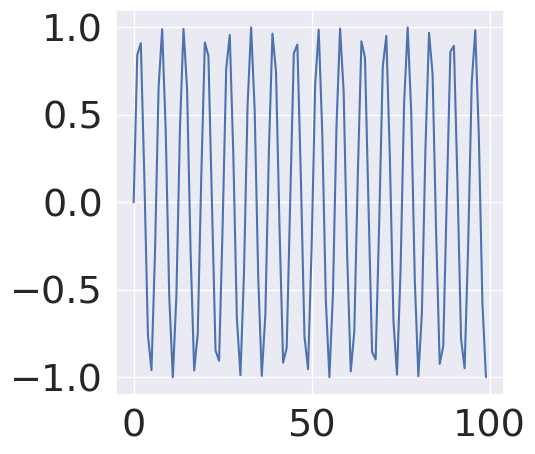

In [30]:
#f = plt.figure(figsize=(10,10))

f, ax = plt.subplots(1, 1, figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

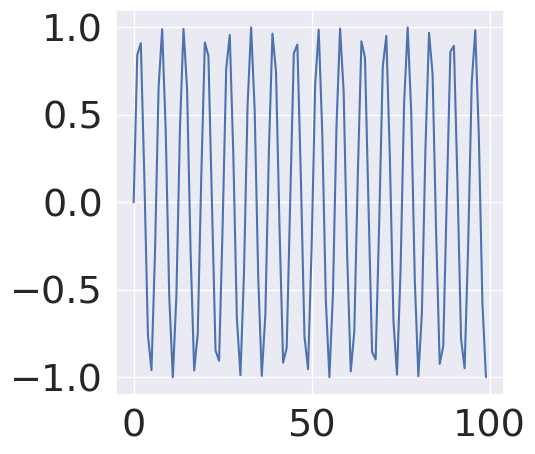

In [31]:
#f = plt.figure(figsize=(10,10))

plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

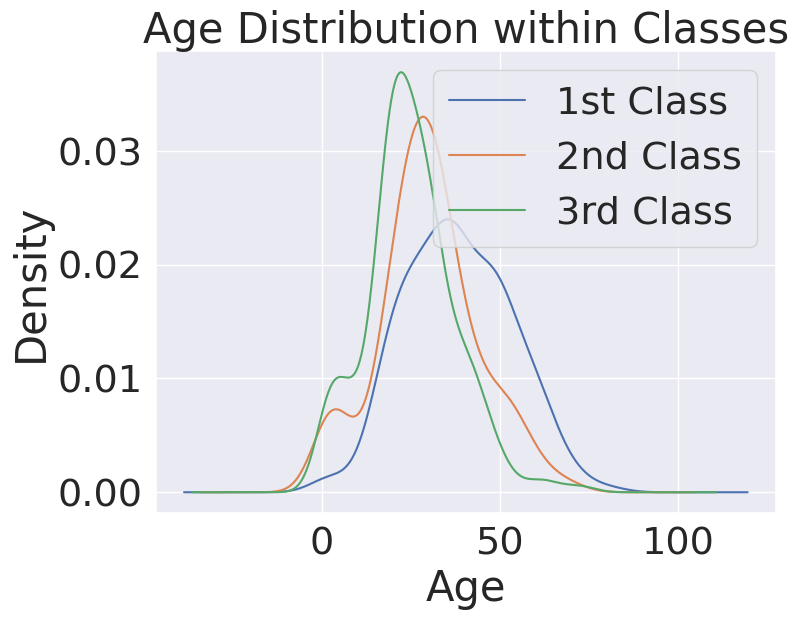

In [32]:
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

단순한 분포를 확인하는 작업

kde -> hist로 하게 된다면, 히스토그램으로 보임

Text(0.5, 0, 'sdf')

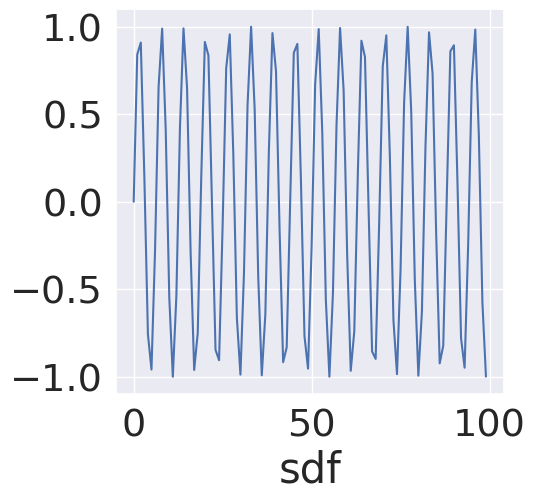

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('sdf')

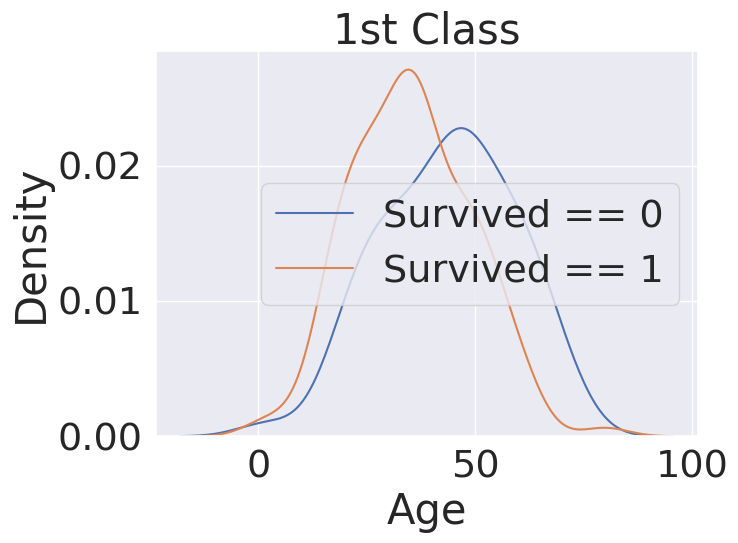

In [34]:
flg, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)

plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st Class')
plt.show()

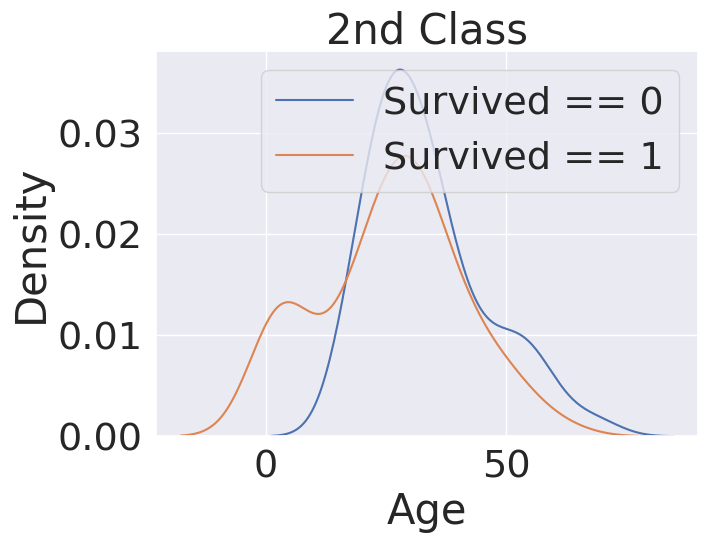

In [35]:
flg, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)

plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2nd Class')
plt.show()

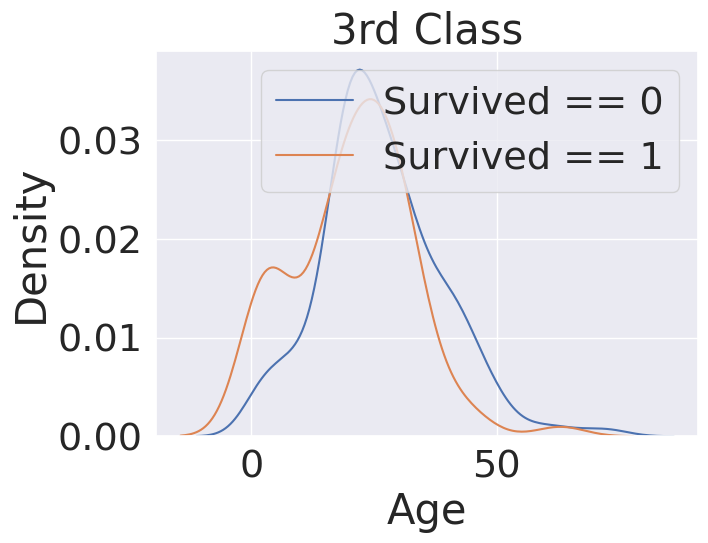

In [36]:
flg, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)

plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3rd Class')
plt.show()

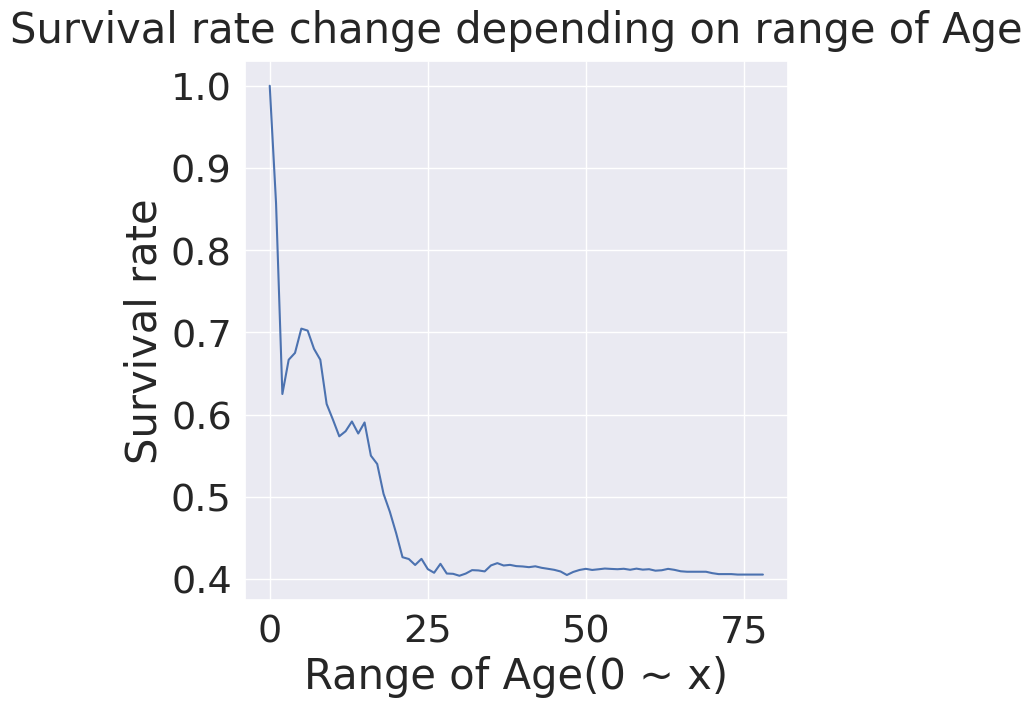

In [37]:
change_age_range_survival_ratio = []

for i in range (1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0 ~ x)')
plt.show()

In [38]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])

0.6129032258064516

**Pclass, Sex, Age**

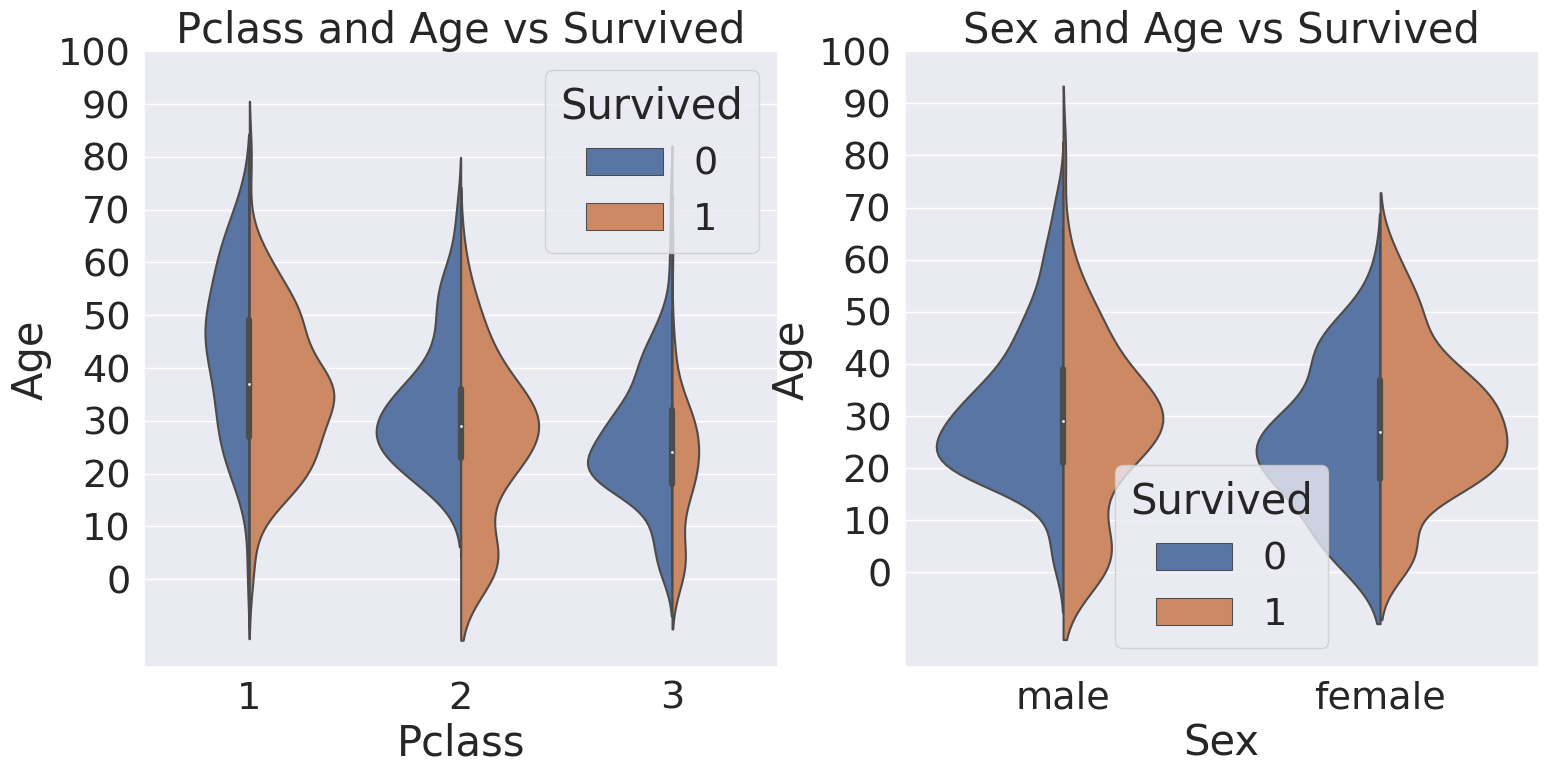

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split = True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='area', split = True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

나이와 성별에 따른 생존자 파악

**Embarked**

<Axes: xlabel='Embarked'>

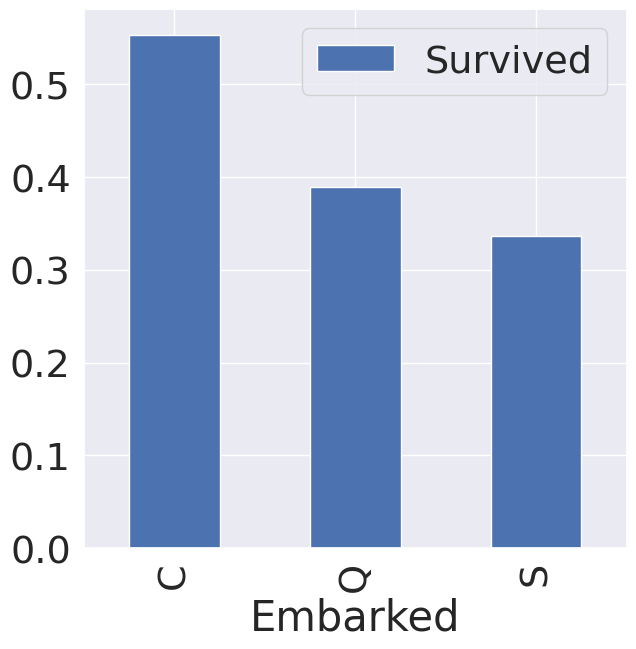

In [40]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

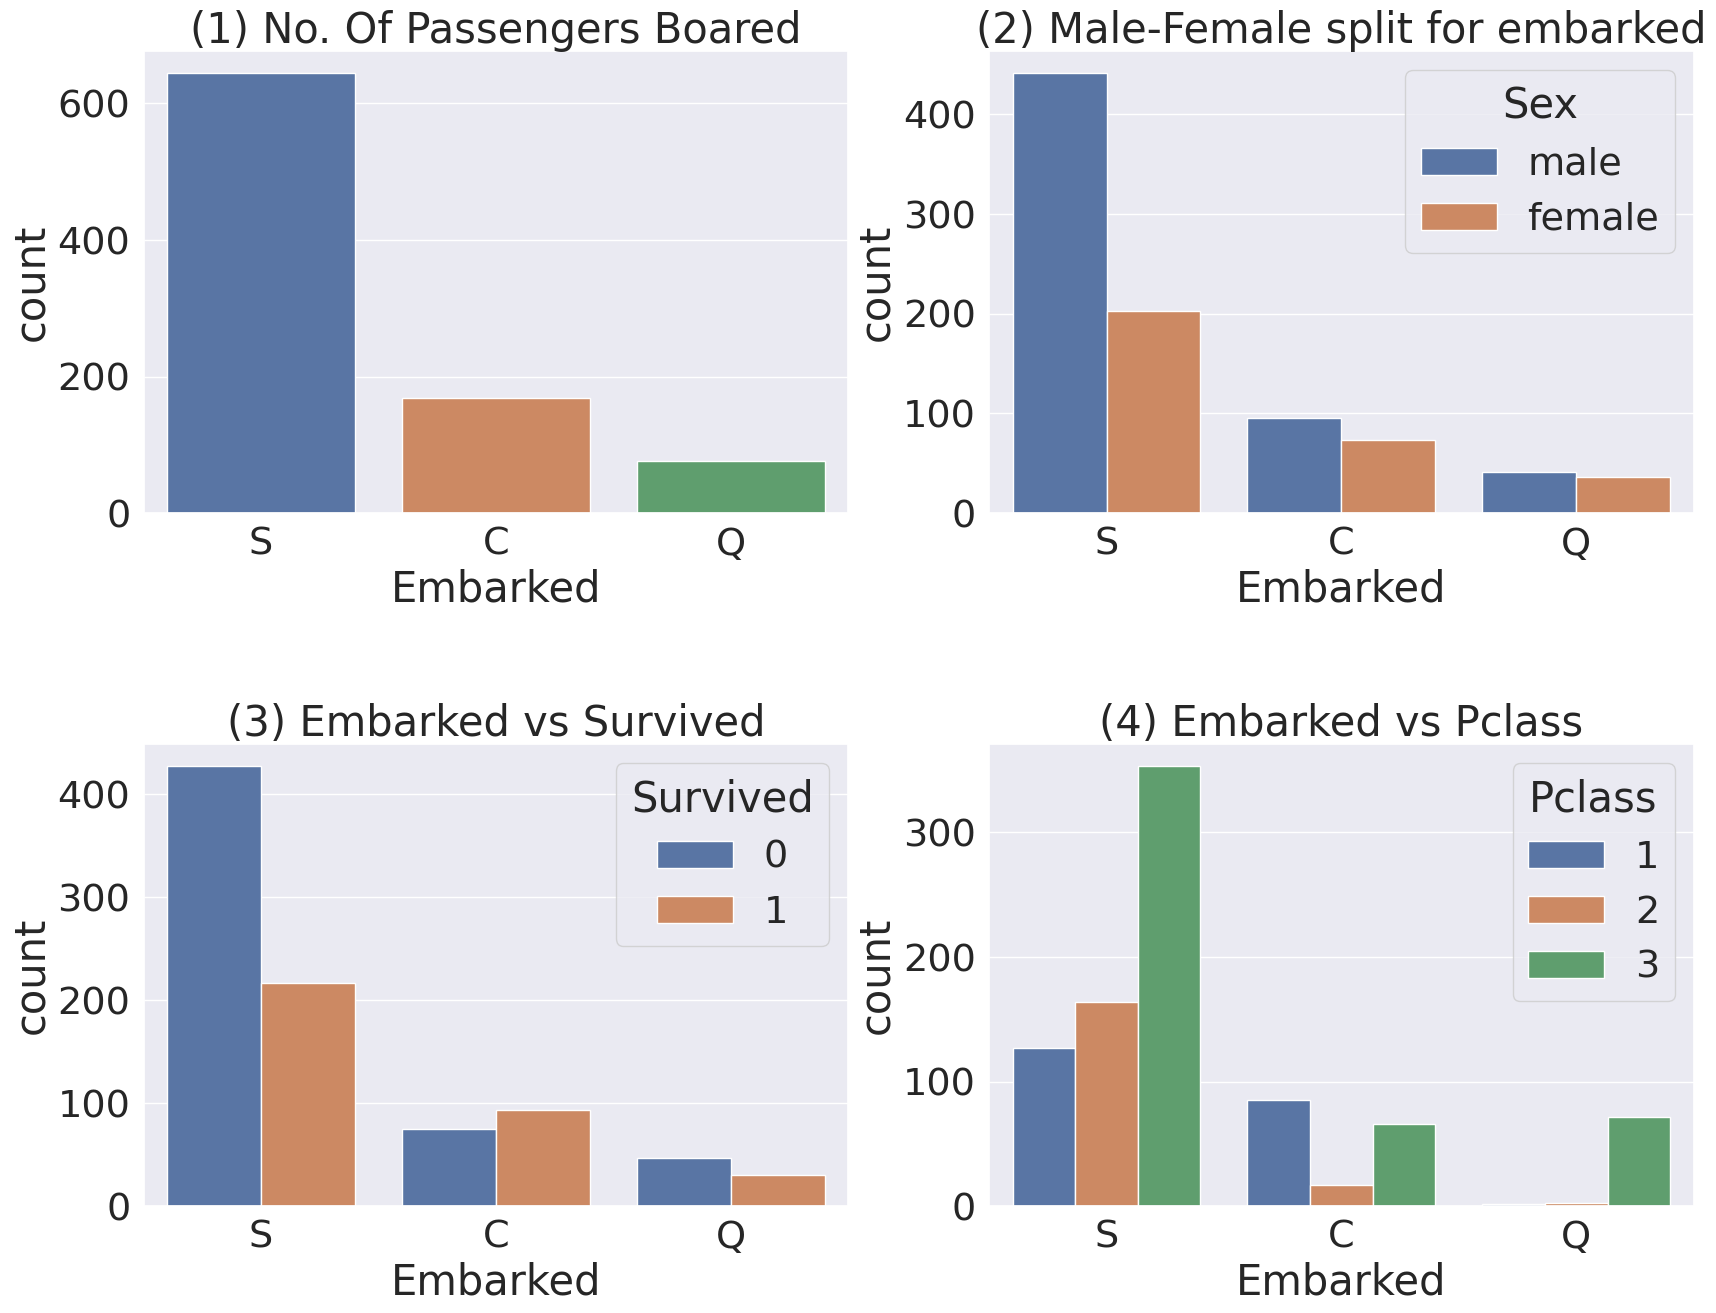

In [41]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x= 'Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boared')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

S보다 C, Q가 더 많이 생존율이 더 높다.

**Family - SibSp + Parch**

In [42]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [43]:
#코드 추가
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [44]:
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [45]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimun size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimun size of Family:  1


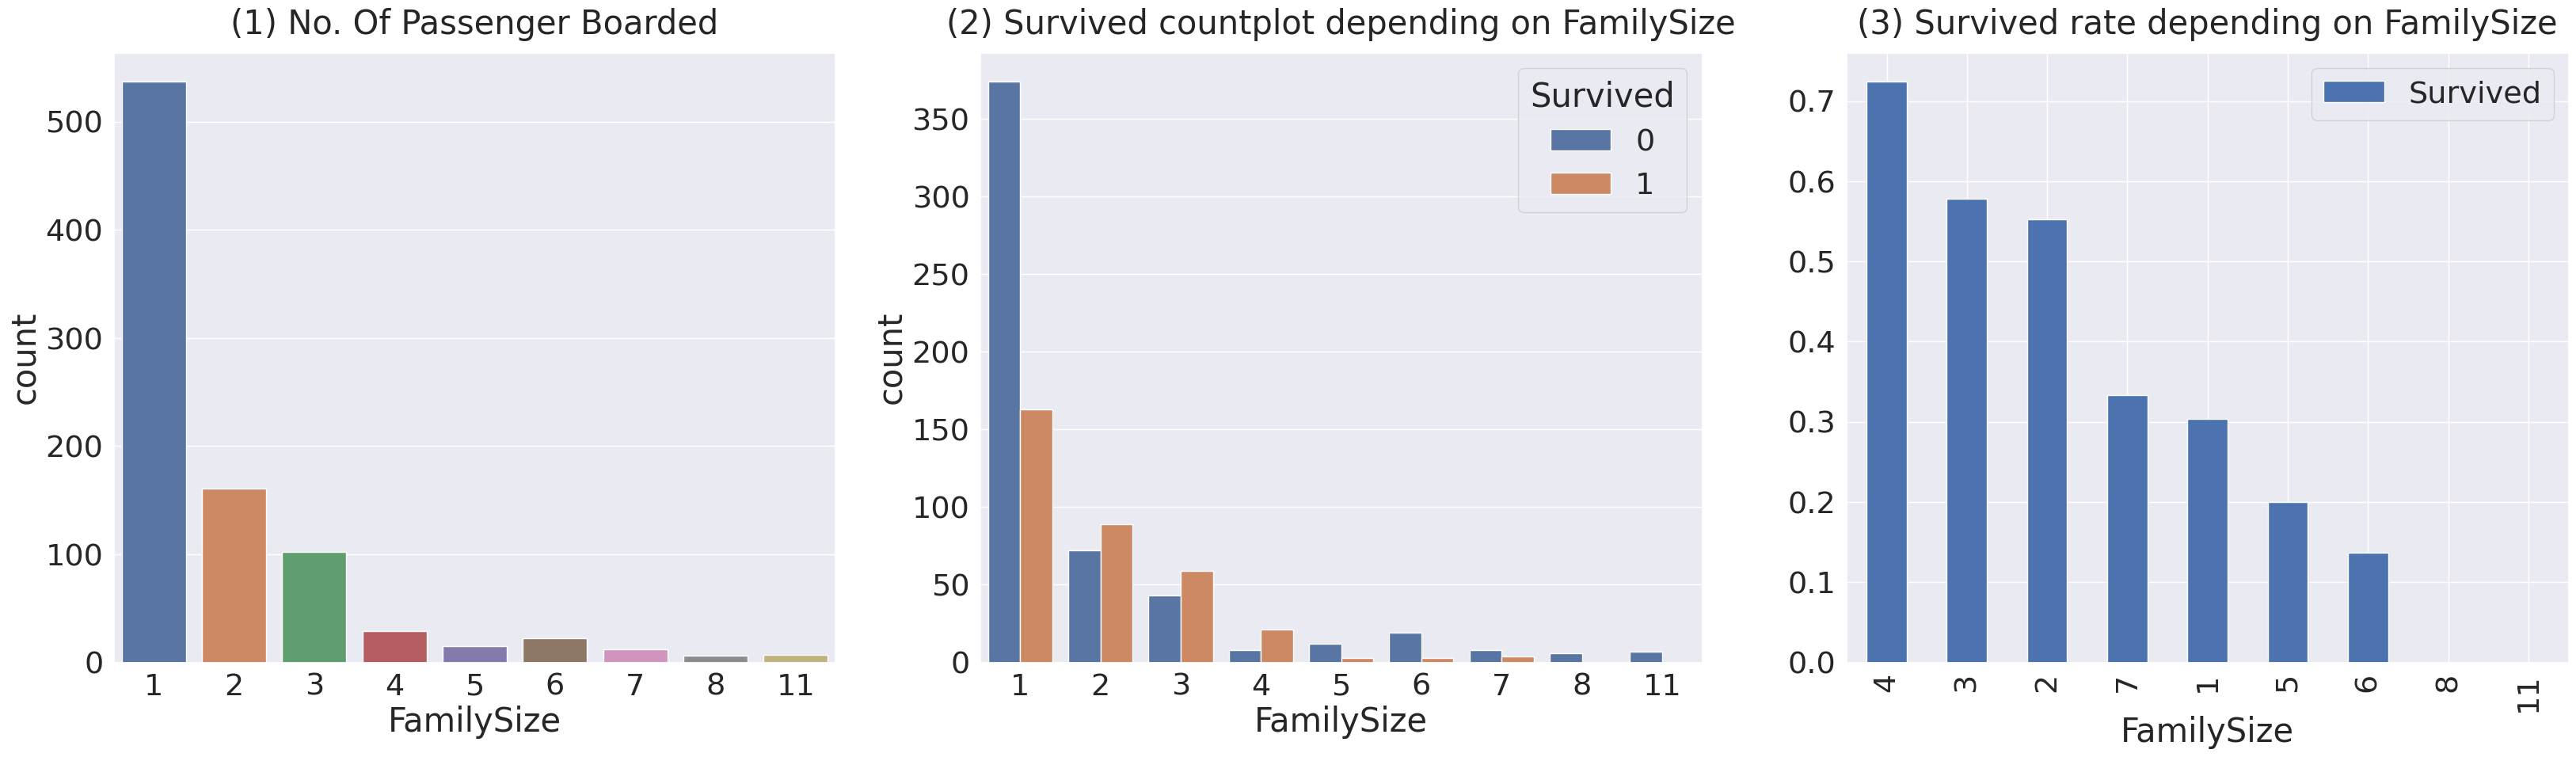

In [46]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

4명, 3명 정도가 생존확률이 높음

**Fare**

In [47]:
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)

해당 작업은 중앙으로 분포를 맞춰주기 위해 람다 함수 활용하는 것을 나타냄

g는 그림 객체를 나타냄. 그래프를 나타내는 대명사.

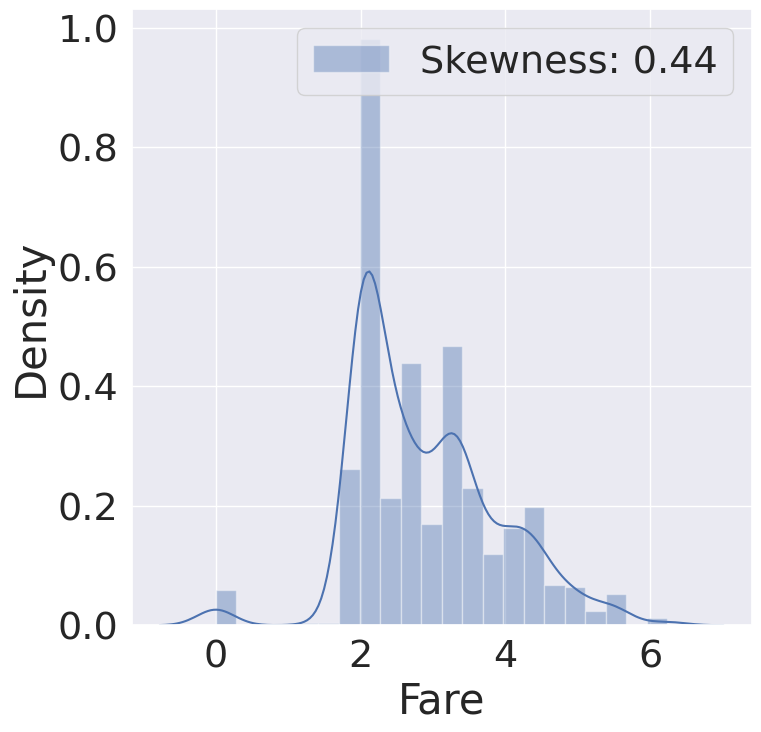

In [48]:
fig, ax=plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc = 'best')

**왜도**

왜도는 분포의 비대칭도를 나타내는 통계량이다. 정규분포, T분포와 같이 대칭인 분포의 경우 왜도가 0이다. 
카이제곱분포와 같이 오른쪽으로 긴 꼬리를 가진 경우(skewed to the right) 왜도는 양수이다.

이때, 다음과 같이 치우친 분포의 경우 이를 파악하기 위해서 그어야 하는 줄이 왼쪽으로 쏠린 상태의 줄이어야 해당 분포에 대해서 잘 설명할 수 있는데, 줄을 그을 때에는 보통 가운데를 긋는 경우가 많고 해당 분포를 관통하여 알기 어렵기 때문에 보정이 필요하다.

이를 위해서 취하는 방법이 로그를 취하는 방법이다.

**lambda**

lambda는 함수임

예제) x = lambda i : i * i

x(3)의 값은? 9 (3 * 3 이므로)

In [49]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

모델의 정확성을 올리고 싶을 때, Ticket 을 이용하여 정확도를 높이는 방법을 사용하고자 함.
현재의 튜토리얼에서는 공부 제외.

**Feature engineering - Fill Null in Age (수정)**

In [50]:
df_train['Age'].isnull().sum()

177

In [51]:
df_train['Age'].mean()

29.69911764705882

In [52]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

str.extract ~ : 정규 표현식에 맞는 데이터를 찾게 해줌

> 역슬래시 뒤에 있는 부분까지만 출력. (\.)에서는 .전까지만 출력.

In [53]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


'.' 이전의 이름들이 남자인지, 여자인지를 나타냄.

In [54]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)

In [55]:
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)

In [56]:
df_train['Initial']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

맨 뒤에 inplace를 작성하지 않으면, 적용이 되지 않음. 반드시, inplace를 넣어줘야 작동이 됨.

In [57]:
print(df_train.select_dtypes(include='number').columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize'],
      dtype='object')


In [58]:
print(df_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
Initial         object
dtype: object


In [59]:
# 숫자형 데이터만 선택하여 그룹화한 후 평균 계산
df_numeric = df_train.select_dtypes(include='number')  # 숫자형 열만 선택
grouped_df = df_numeric.join(df_train['Initial']).groupby('Initial').mean()  # Initial 열과 숫자형 열만 그룹화
print(grouped_df)

         PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Initial                                                                   
Master    414.975000  0.575000  2.625000   4.574167  2.300000  1.375000   
Miss      411.741935  0.704301  2.284946  21.860000  0.698925  0.537634   
Mr        455.880907  0.162571  2.381853  32.739609  0.293006  0.151229   
Mrs       456.393701  0.795276  1.984252  35.981818  0.692913  0.818898   
Other     564.444444  0.111111  1.666667  45.888889  0.111111  0.111111   

             Fare  FamilySize  
Initial                        
Master   3.340710    4.675000  
Miss     3.123713    2.236559  
Mr       2.651507    1.444234  
Mrs      3.443751    2.511811  
Other    2.641605    1.222222  


<Axes: xlabel='Initial'>

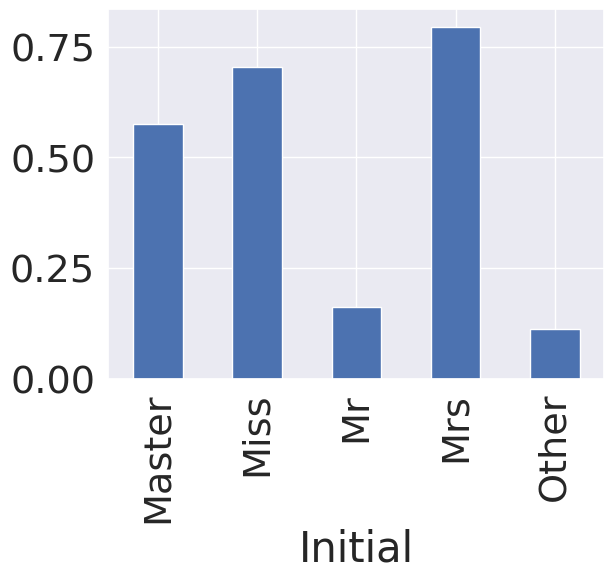

In [60]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

train set에서 얻는 통계치를 가지고 Test를 해야 함.

In [61]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 46

In [62]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 46

NULL 데이터를 평균을 통해 보완.
섬세하게 해줘야 하며, Test는 안 본 상태에서 해야 함.

**Feature engineering - Fill Mull in Embarked and categorize Age**

In [63]:
df_train['Embarked'].isnull().sum()

2

In [64]:
df_train.shape

(891, 14)

In [65]:
df_train['Embarked'].fillna('S', inplace=True)

.fillna : NULL 값 채워주는 함수

In [66]:
df_train['Embarked'].isnull().sum()

0

In [67]:
df_train['Age_cat'] = 0

In [68]:
#코드 추가
df_test['Age_cat'] = 0

Age_cat : 필드값 생성

In [69]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [70]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs,0


In [71]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [72]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [74]:
#코드 추가
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs,2


Apply 함수 활용 : 함수를 넣어줄 수 있는 함수

In [75]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

위와 같이 함수를 생성한 뒤, 해당 함수를 apply 함수에 넣을 것

In [76]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [77]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

하나라도 False 이면, False

In [78]:
(df_train['Age_cat'] == df_train['Age_cat_2']).any()

True

하나라도 True 이면, True

In [79]:
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace=True)
df_test.drop(['Age'], axis = 1, inplace = True)

**Feature Engineering - Change string to categorical and Person coefficient**

In [80]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [81]:
df_train.loc[df_train['Initial'] == 'Master', 'Initial']

7      Master
16     Master
50     Master
59     Master
63     Master
65     Master
78     Master
125    Master
159    Master
164    Master
165    Master
171    Master
176    Master
182    Master
183    Master
193    Master
261    Master
278    Master
305    Master
340    Master
348    Master
386    Master
407    Master
445    Master
480    Master
489    Master
549    Master
709    Master
751    Master
755    Master
787    Master
788    Master
802    Master
803    Master
819    Master
824    Master
827    Master
831    Master
850    Master
869    Master
Name: Initial, dtype: object

In [82]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

In [83]:
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

In [84]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [85]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

위의 것은 numpy array이고, 밑의 것은 pandas array인데, 이 두 가지의 패키지는 서로 호환이 잘 됨.

In [86]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 1, 'Q' : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 1, 'Q' : 1, 'S' : 2})

In [87]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,1,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [88]:
df_train.Embarked.isnull().sum()

0

In [89]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

----- 여기까지의 내용이 수치화 전처리 과정 ------

선형 상관관계 분석 : 피어슨 상관관계

1 : 양의 상관관계
-1 : 음의 상관관계
0 : 상관관계 없음

In [90]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

.corr() : 각 피처마다의 상관성을 분석해 주는 함수

<Axes: title={'center': 'Person Correalation of Features'}>

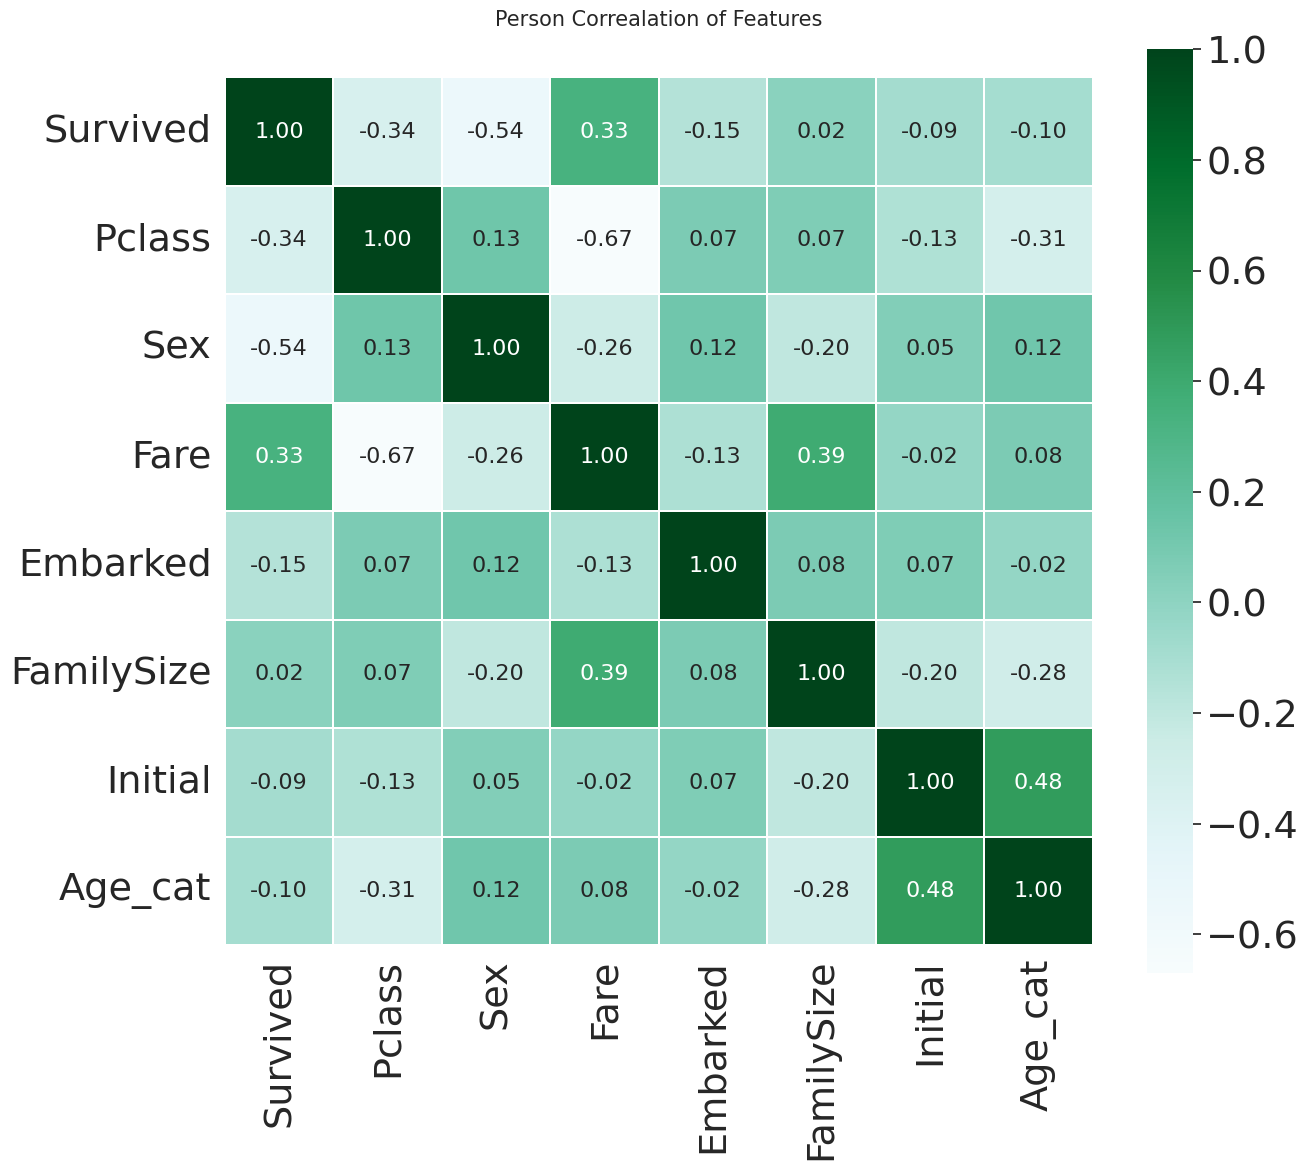

In [91]:
colormap = plt.cm.BuGn
plt.figure(figsize = (14, 12))
plt.title('Person Correalation of Features', y=1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square=True, cmap = colormap, linecolor = 'white', annot=True, annot_kws={'size' : 16}, fmt = '.2f')

**Feature engineering - One-hot encoding on the Initial and Embarked**

one-hot encoding : (0, 1)로 이뤄진 5차원의 벡터로 나타내는 것, 0과 1로 옳고 그름을 나타냄. a가 a인지 아닌지를 알면 됨.

get_dummies : 원하는 인코딩을 만드는 판다스 함수

In [92]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,1,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [93]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [94]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

이렇게 적은 카테고리 개수에는 인코딩 방법은 괜찮지만, 만약 카테고리가 100개가 넘어가는 경우에는 너무 많아지기 때문에 다른 방법을 활용하는 것이 좋음 ; 다른 방법은 나중에 알게 될 예정.

In [95]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [96]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,True


In [97]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_1,Embarked_2
0,3,1,7.8292,1,3,False,False,True,False,False,True,False
1,3,0,7.0000,2,4,False,False,False,True,False,False,True
2,2,1,9.6875,1,6,False,False,True,False,False,True,False
3,3,1,8.6625,1,2,False,False,True,False,False,False,True
4,3,0,12.2875,3,2,False,False,False,True,False,False,True


**Model development - Machine Learning (Random Forest)**

sklearn을 이용한 머신러닝을 기획. 방법은 랜덤포레스트 사용.

sklearn은 처음부터 끝까지 진행.

1) 랜덤포레스트
   결정트리 - 결정트리를 무작위로 만들고 평균 냄.
2) 메트릭스
   모델 평가
3) 모델
   쉽게 나눌 수 있음

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

해당 부분은 바이너리 클래시피케이션 (0과 1로 이루어졌기 때문)

트레인셋에서 뺀다음, 나머지 인풋을 가지고 모델 최적화 - 랜덤포레스트 ; 각 샘플의 생존 유무 생성
트스트셋의 각 생존 유무 판단 예정

1) 쓰일 데이터 분리

목적 : 테스트셋
바로 테스트셋을 분석해 버리면, 근본이 되는 트레인셋이 좋은지, 안 좋은지 판단하기 어려움.
-> 트레인셋을 트레인과 벨리드셋으로 나누어서 벨리드셋에 대해서 검증을 해봄. 벨리드셋이 성능이 좋으면, 테스트셋에 적용

축구 대표팀이 훈련하는데, 검증을 해야함. 정말 훈련이 잘 들어 맞는지 평가전 진행 -> 이러한 방식임.

In [99]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [100]:
df_train.shape

(891, 13)

우리가 현재 진행하고 있는 학습은 '지도 학습'
목적이 되는 레이블을 제시하면 지도 학습, 그렇지 않으면 비지도 학습

머신러닝에는 파라미터가 존재

In [101]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

X_vid에 30%를 주고, X_tr에 70%를 줌.

In [102]:
X_tr.shape

(623, 12)

In [103]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

X_tr, y_tr 이용하여 학습

In [104]:
prediction = model.predict(X_vid)

모델이 vid 셋에 대하여 예측

In [105]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vid.shape[0], 100 * metrics.accuracy_score(prediction, y_vid)))

총 268명 중 82.84% 정확도로 생존 맞춤


**Machine Learning Prediction - Feature Importance and Prediction on test set**

학습된 모델은 feature importance를 가지게 되는데, 이를 확인하여 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인 가능.

예를 들어, 9 = 4*1 + 2*2 + 1*3에서 feature importance는 4, 2, 1을 의미. 종속변수에 가장 큰 영향을 미치는 것은 4이므로, 이 모델에 가장 큰 영향을 미치는 것은 4임.

이러한 feature importance는 학습 시킨 모델이라면 반드시 가지고 있음.

In [106]:
model.feature_importances_

array([0.09966341, 0.10841989, 0.34198065, 0.09536198, 0.12424147,
       0.01063109, 0.04002303, 0.11752883, 0.02745047, 0.0050613 ,
       0.01571893, 0.01391893])

In [107]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,True


In [108]:
from pandas import Series

In [109]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

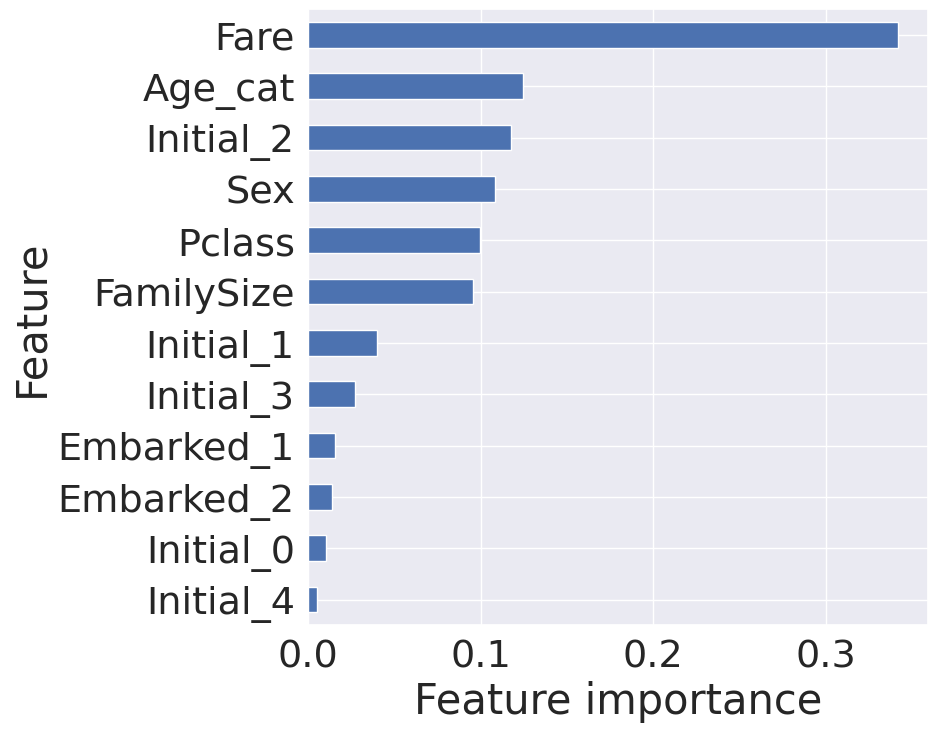

In [110]:
plt.figure(figsize = (8,8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

이 순서로 이 모델에 중요하게 작용한 것임.


fare, sex, pclass가 생존에 중요하다는 것을 가설로 세울 수 있음.

In [111]:
submission = pd.read_csv('../input/titanic-input-data/gender_submission.csv')

In [112]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [113]:
X_test

array([[3, 1, 7.8292, ..., False, True, False],
       [3, 0, 7.0, ..., False, False, True],
       [2, 1, 9.6875, ..., False, True, False],
       ...,
       [3, 1, 7.25, ..., False, False, True],
       [3, 1, 8.05, ..., False, False, True],
       [3, 1, 22.3583, ..., False, True, False]], dtype=object)